<a href="https://colab.research.google.com/github/garimaahuja112/Parameter-Optimization-of-SVM-Garima-102203385/blob/main/102203385.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

# Load data
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Preprocess data
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, NuSVC
from sklearn.metrics import accuracy_score

# Define SVM parameter ranges
kernels = ['linear', 'rbf', 'poly']
nu_values = np.linspace(0.01, 0.99, 50)     # for NuSVC
C_values = np.logspace(-2, 2, 50)           # for SVC
degree_values = [2, 3, 4]                   # for poly
gamma_values = ['scale', 'auto']

# Store results for 10 samples
results_table = []
all_sample_accuracies = []

# For convergence plot
sample_with_max_acc = -1
max_acc_all = 0
convergence_acc = []
convergence_params = []

for sample_num in range(10):
    print(f"\nRunning Sample S{sample_num+1}...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=sample_num)

    best_acc = 0
    best_params = {}
    sample_accuracies = []

    for i in range(100):
        # Random kernel
        kernel = np.random.choice(kernels)
        gamma = np.random.choice(gamma_values)
        degree = np.random.choice(degree_values)
        nu = np.random.choice(nu_values)
        C = np.random.choice(C_values)

        try:
            # NuSVC supports linear/poly/rbf kernels, but not all combinations always work with small nu
            if np.random.rand() < 0.5:
                model = NuSVC(kernel=kernel, nu=nu, gamma=gamma, degree=degree)
            else:
                model = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)

            model.fit(X_train, y_train)
            acc = accuracy_score(y_test, model.predict(X_test))
            sample_accuracies.append(acc)

            if acc > best_acc:
                best_acc = acc
                best_params = {
                    'kernel': kernel,
                    'C_or_nu': nu if isinstance(model, NuSVC) else C,
                    'model_type': type(model).__name__,
                    'gamma': gamma,
                    'degree': degree
                }

        except Exception as e:
            # Skip invalid parameter combos
            continue

    # Store results
    results_table.append({
        'Sample': f'S{sample_num+1}',
        'Best Accuracy': best_acc,
        'Best Params': best_params
    })
    all_sample_accuracies.append(sample_accuracies)

    # Track best sample for convergence plot
    if best_acc > max_acc_all:
        max_acc_all = best_acc
        sample_with_max_acc = sample_num
        convergence_acc = sample_accuracies
        convergence_params = best_params

# Best Accuracy & Parameters
results_df = pd.DataFrame(results_table)
print("\nComparative performance of Optimized-SVM with different samples")
print(results_df.to_string(index=False))


Running Sample S1...

Running Sample S2...

Running Sample S3...

Running Sample S4...

Running Sample S5...

Running Sample S6...

Running Sample S7...

Running Sample S8...

Running Sample S9...

Running Sample S10...

Comparative performance of Optimized-SVM with different samples
Sample  Best Accuracy                                                                                           Best Params
    S1       0.931929  {'kernel': 'rbf', 'C_or_nu': 0.9102981779915218, 'model_type': 'SVC', 'gamma': 'scale', 'degree': 3}
    S2       0.934378              {'kernel': 'poly', 'C_or_nu': 100.0, 'model_type': 'SVC', 'gamma': 'scale', 'degree': 3}
    S3       0.937071   {'kernel': 'rbf', 'C_or_nu': 32.374575428176435, 'model_type': 'SVC', 'gamma': 'auto', 'degree': 4}
    S4       0.929481   {'kernel': 'rbf', 'C_or_nu': 56.89866029018293, 'model_type': 'SVC', 'gamma': 'scale', 'degree': 2}
    S5       0.931685    {'kernel': 'rbf', 'C_or_nu': 2.329951810515372, 'model_type': 'SVC', 

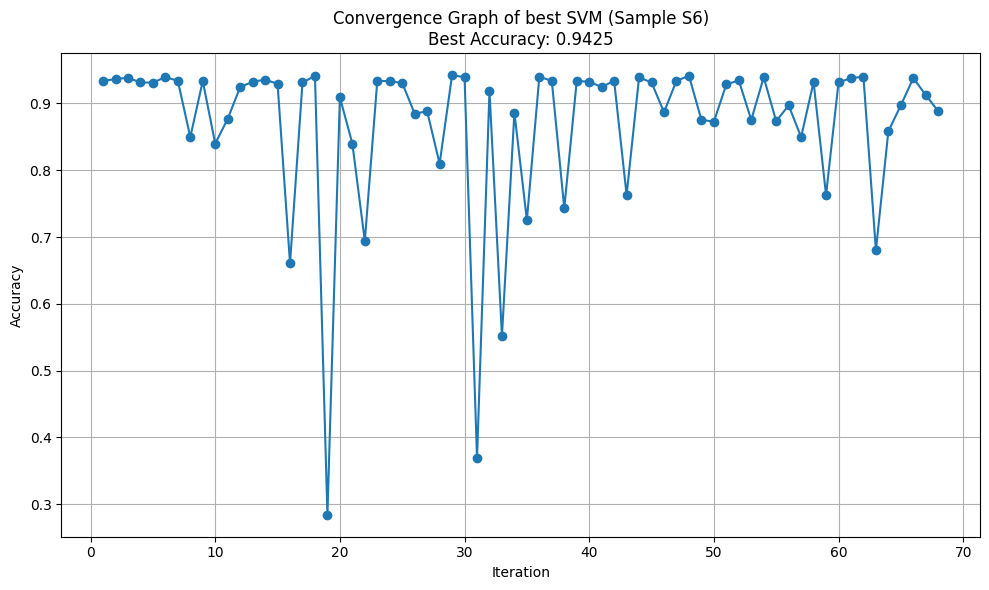

In [16]:
import matplotlib.pyplot as plt

# Convergence Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(convergence_acc)+1), convergence_acc, marker='o')
plt.title(f'Convergence Graph of best SVM (Sample S{sample_with_max_acc+1})\nBest Accuracy: {max_acc_all:.4f}')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()